In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Plot 1



In [2]:
# Import dataset that was manually copied from data source
df1 = pd.read_excel('Depressive_Disorders_Percentage_Singapore.xlsx')

In [3]:
# Aggregate data into larger age groups, 
# namely: children (< 15), youth (15-24), adults(25-64), Senior(65+)
age_group_map = {
    'Ages 05-14': 'Children',
    'Ages 15-19': 'Youths',
    'Ages 20-24': 'Youths',
    'Ages 25-29': 'Adults',
    'Ages 30-34': 'Adults',
    'Ages 35-39': 'Adults',
    'Ages 40-44': 'Adults',
    'Ages 45-49': 'Adults',
    'Ages 50-54': 'Adults',
    'Ages 55-59': 'Adults',
    'Ages 60-64': 'Adults',
    'Ages 65-69': 'Seniors',
    'Ages 70+': 'Seniors'
}
df1['age_group_agg'] = df1['Age Group'].map(age_group_map)
df1.head(20)

,Year,Age Group,Prevalence of Depressive Disorders (%),age_group_agg
0,2000,Ages 05-14,0.51,Children
1,2000,Ages 15-19,3.05,Youths
2,2000,Ages 20-24,4.58,Youths
3,2000,Ages 25-29,4.20,Adults
4,2000,Ages 30-34,3.86,Adults
5,2000,Ages 35-39,3.74,Adults
6,2000,Ages 40-44,3.58,Adults
7,2000,Ages 45-49,3.39,Adults
8,2000,Ages 50-54,3.20,Adults
9,2000,Ages 55-59,3.01,Adults


In [ ]:
# Calculate mean rate for each year by age group
final_df1 = df1.groupby(['Year', 'age_group_agg'], as_index=False).agg({'Prevalence of Depressive Disorders (%)': 'mean'}).round(2)

In [5]:
final_df1[final_df1['age_group_agg'] == 'Youths']

,Year,age_group_agg,Prevalence of Depressive Disorders (%)
3,2000,Youths,3.82
7,2001,Youths,3.68
11,2002,Youths,3.49
15,2003,Youths,3.29
19,2004,Youths,3.13
23,2005,Youths,3.07
27,2006,Youths,3.09
31,2007,Youths,3.12
35,2008,Youths,3.14
39,2009,Youths,3.18


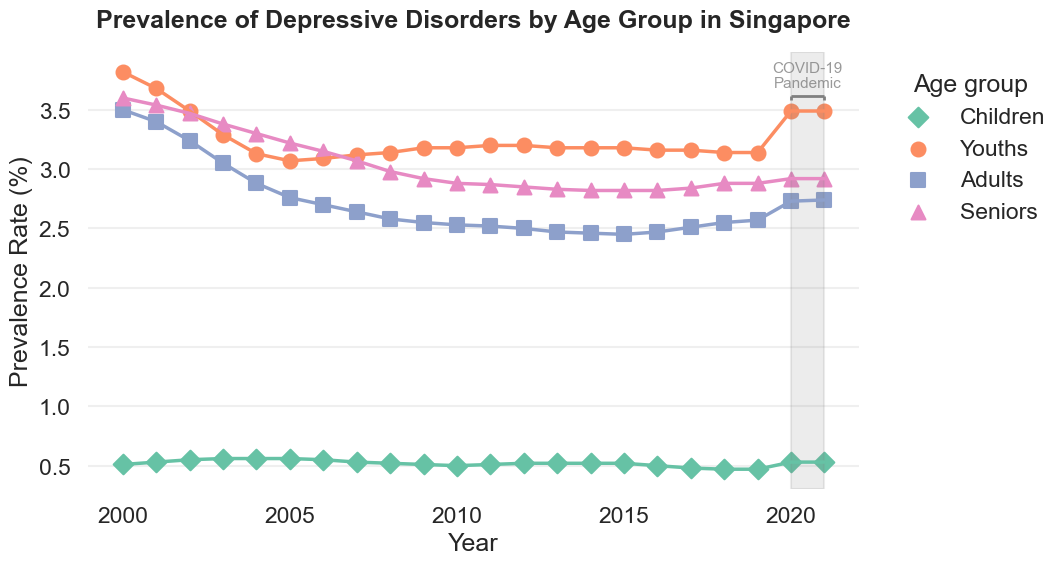

In [ ]:
sns.set_theme(style="white", context="talk")
# Create ordering of age groups
life_order = ['Children', 'Youths', 'Adults', 'Seniors']
# symbol mapping for each age group
marker_map = {
    'Children': 'D',
    'Youths': 'o',
    'Adults': 's',
    'Seniors': '^'
}

plt.figure(figsize=(11, 6))

# Base line plot
sns.lineplot(
    data=final_df1,
    x='Year',
    y='Prevalence of Depressive Disorders (%)',
    hue='age_group_agg',
    hue_order=life_order,
    palette='Set2',
    linewidth=2.5,
    errorbar=None,
    legend=False
)

# Overlay markers
for age_group in life_order:
    subset = final_df1[final_df1['age_group_agg'] == age_group]
    plt.scatter(
        subset['Year'],
        subset['Prevalence of Depressive Disorders (%)'],
        marker=marker_map[age_group],
        s=100,  # marker size
        color=sns.color_palette('Set2')[life_order.index(age_group)],
        label=age_group
    )

# Labels & title
plt.title(
    'Prevalence of Depressive Disorders by Age Group in Singapore',
    fontsize=18,
    weight='bold',
    pad=18)
plt.xlabel('Year')
plt.ylabel('Prevalence Rate (%)')

# Subtle horizontal grid only
plt.grid(axis='y', alpha=0.3)
sns.despine(left=True, bottom=True)

# Legend styling
plt.legend(
    title='Age group',
    frameon=False,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

ymin, ymax = plt.ylim()
y_text = ymax - 0.02 * (ymax - ymin)
y_line = ymax - 0.1 * (ymax - ymin)

# Add in gray background for COVID years
plt.axvspan(2020, 2021, color='grey', alpha=0.15)
plt.text(
    2020.5,
    y_text,
    'COVID-19\nPandemic',
    ha='center',
    va='top',
    fontsize=11,
    color='grey',
    linespacing=1.1,
    alpha=0.8
)

plt.hlines(y_line, 2020, 2021, colors='grey', linewidth=2)
plt.vlines([2020, 2021], y_line - 0.01*(ymax-ymin), y_line, colors='grey', linewidth=2)

plt.tight_layout()
plt.show()


# Plot 2: NEET figures in Singapore

In [ ]:
# Import and change data to long format
df2 = pd.read_excel('mrsd_81_NEET_Rate_Sex.xlsx', skiprows=3, nrows=3)
df2_final = df2.melt(id_vars='Year',value_name='NEET Rate')
df2_final.columns = ['Type', 'Year', 'NEET Rate']
# Remove Total data
df2_final = df2_final[df2_final['Type'] != 'Total']
df2_final.head(30)

,Type,Year,NEET Rate
1,Male,2013,2.8
2,Female,2013,4.8
4,Male,2014,2.5
5,Female,2014,4.9
7,Male,2015,2.7
8,Female,2015,4.7
10,Male,2016,2.9
11,Female,2016,5.2
13,Male,2017,3.6
14,Female,2017,5.5


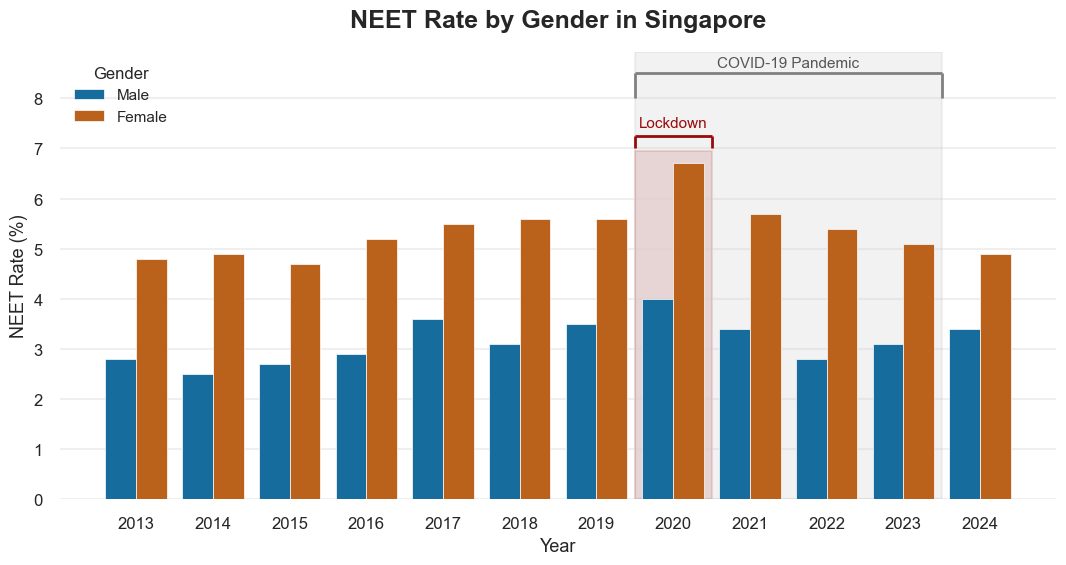

In [ ]:
sns.set_theme(style="white", context="talk")
cb_palette = {
    'Male': '#0072B2', 
    'Female': '#D55E00' 
}
plt.figure(figsize=(11, 6))
# Bar plot of NEET rate for each year, by gender
sns.barplot(df2_final,
            x='Year',
            y='NEET Rate',
            hue='Type',
            palette=cb_palette,
            linewidth=0.5)

# Labels & title
plt.title(
    'NEET Rate by Gender in Singapore',
    fontsize=18,
    weight='bold',
    pad=18
)

plt.xlabel('Year', fontsize=13)
plt.ylabel('NEET Rate (%)', fontsize=13)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Subtle horizontal grid only
plt.grid(axis='y', alpha=0.3)
sns.despine(left=True, bottom=True)

# Legend styling
plt.legend(
    title='Gender',
    title_fontsize=12,
    fontsize=11,
    frameon=False,
    loc='upper left'
)

ymin, ymax = plt.ylim()
y_text = ymax - 0.02 * (ymax - ymin)
y_line = ymax - 0.1 * (ymax - ymin)

# Add in gray background for COVID years
plt.axvspan(6.5, 10.5, color='#999999', alpha=0.12, zorder=0)

# Add red background for lockdown period
plt.axvspan(6.5, 7.5, ymax=7/9, color='#990A0A', alpha=0.12, zorder=0)

# Lockdown text and interval
plt.text(
    7,
    7.65,
    'Lockdown',
    ha='center',
    va='top',
    fontsize=11,
    color="#990A0A"
)
plt.hlines(7.25, 6.5, 7.5, colors="#990A0A", linewidth=2)
plt.vlines([6.5, 7.5], 7, 7.25, colors="#990A0A", linewidth=2)

# Pandemic text and interval
plt.text(
    8.5,
    8.85,
    'COVID-19 Pandemic',
    ha='center',
    va='top',
    fontsize=11,
    color='#555555'
)
plt.hlines(8.5, 6.5, 10.5, colors='grey', linewidth=2)
plt.vlines([6.5, 10.5], 8, 8.5, colors='grey', linewidth=2)



plt.tight_layout()
plt.show()

# Plot 3: Correlation between depressive disorders and NEET

In [ ]:
# Import and pivot to long format
df3 = pd.read_excel('Vocation_data.xlsx')
df3_final = df3.melt(
    id_vars='Vocation',
    value_vars=['Depression', 'Anxiety'],
    var_name='Condition',
    value_name='Rate'
)
df3_final.head(8)

,Vocation,Condition,Rate
0,Serving National Service,Depression,15.3
1,First year of diploma/degree,Depression,16.2
2,NEET,Depression,29.8
3,Working,Depression,11.8
4,Serving National Service,Anxiety,33.4
5,First year of diploma/degree,Anxiety,24.3
6,NEET,Anxiety,38.4
7,Working,Anxiety,24.1


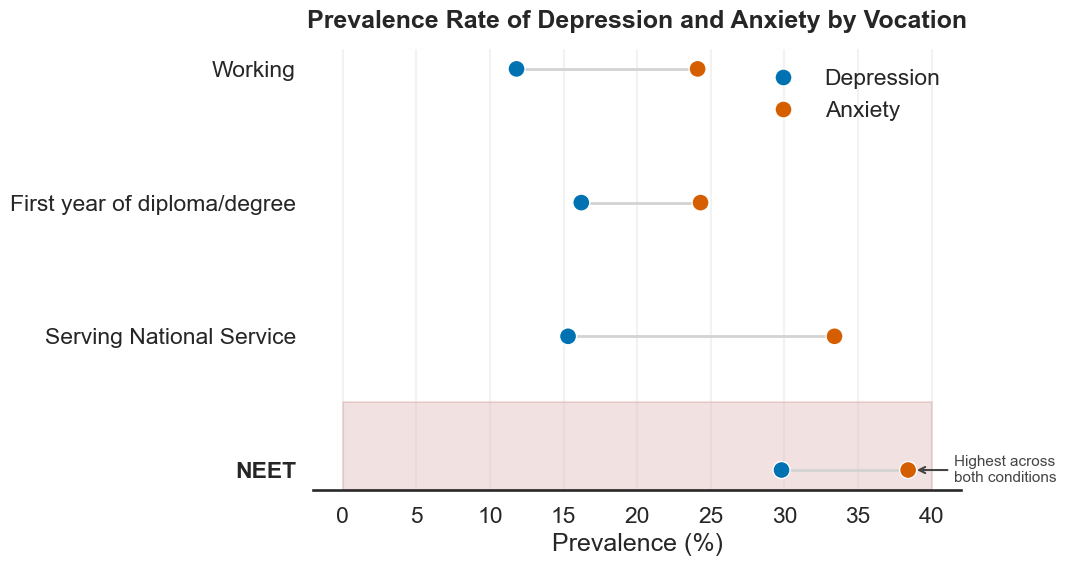

In [ ]:
# Consistent ordering of mental disorders for each vocation group
vocation_order = (
    df3.assign(max_rate=df3[['Depression', 'Anxiety']].max(axis=1))
      .sort_values('max_rate')
      ['Vocation']
)

sns.set_theme(style="white", context="talk")

plt.figure(figsize=(11, 6))
ax = plt.gca()

# Draw dumbbell bars for each group
for voc in vocation_order:
    subset = df3[df3['Vocation'] == voc]
    ax.plot(
        [subset['Depression'].values[0], subset['Anxiety'].values[0]],
        [voc, voc],
        color='lightgrey',
        linewidth=2,
        zorder=1
    )

# Plot the dots in the dumbbells
sns.scatterplot(
    data=df3_final,
    x='Rate',
    y='Vocation',
    hue='Condition',
    palette={
        'Depression': '#0072B2',  # colorblind safe blue
        'Anxiety': '#D55E00'      # colorblind safe orange
    },
    s=150,
    zorder=2
)

# Emphasise NEET row
ax.get_yticklabels()[list(vocation_order).index('NEET')].set_fontweight('bold')
plt.grid(axis='x', alpha=0.25)
plt.subplots_adjust(left=0.28)

# Labels and title
plt.title('Prevalence Rate of Depression and Anxiety by Vocation', pad=15, weight='bold')
plt.xlabel('Prevalence (%)')
plt.ylabel('')

# Red background and text for NEET group
plt.axvspan(0, 40, ymax=1/5, color='#990A0A', alpha=0.12, zorder=0)
plt.annotate(
    'Highest across\nboth conditions',
    xy=(38.8, 'NEET'),
    xytext=(41.5, 'NEET'),
    va='center',
    fontsize=11,
    color='#444444',
    arrowprops=dict(arrowstyle='->', color='#444444')
)

sns.despine(left=True)
plt.legend(title='', frameon=False)

plt.tight_layout()
plt.show()